## Predict the IMDb score by using Python

#### Step 1: Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

#### Step 2: Load IMDB dataset

In [66]:
df = pd.read_csv('../Proiect IMDb Rating/DataSchool_IMDB_Clean.csv', encoding = 'utf-8')
df.head()

FileNotFoundError: [Errno 2] No such file or directory: '../Proiect IMDb Rating/DataSchool_IMDB_Clean.csv'

#### Step 3: Have an overview of your data
1. df.head() 
2. df.info() 
3. df.describe() 
4. etc...

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4804 entries, 0 to 4803
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         4804 non-null   object 
 1   Date         4804 non-null   int64  
 2   Rate         4804 non-null   float64
 3   Votes        4804 non-null   int64  
 4   Genre        4804 non-null   object 
 5   Duration     4804 non-null   float64
 6   Type         4804 non-null   object 
 7   Certificate  4804 non-null   object 
 8   Episodes     4804 non-null   int64  
 9   Nudity       4804 non-null   object 
 10  Violence     4804 non-null   object 
 11  Profanity    4804 non-null   object 
 12  Alcohol      4804 non-null   object 
 13  Frightening  4804 non-null   object 
dtypes: float64(2), int64(3), object(9)
memory usage: 525.6+ KB


INSIGHTS: 
- 4804 movies and tv shows available in the dataset
- We have 14 columns in our dataset, some of them are categorical data that should be transformed into numerical ones, such as Type, genre, Certificate and the last 5 that describe movies

In [4]:
df['Type'].value_counts()

Film      3431
Series    1373
Name: Type, dtype: int64

In [5]:
df.groupby('Type')['Violence'].value_counts()

Type    Violence
Film    Moderate    1075
        Mild         964
        Severe       767
        No Rate      625
Series  No Rate      461
        Moderate     361
        Mild         339
        Severe       212
Name: Violence, dtype: int64

INSIGHTS: 
- Most of movies and tv shows have a moderate violence

#### Step 4: Clean the data
- I decided to do the cleaning part separately and for the IMDB dataset I've managed to do the following:
    - removing the duplicates based on "Title" (4804 observations left)
    - replacing the "No Votes" values with 0 for "Votes"
    - replacing the "No Rate" values with 0 for "Rate"
    - replacing  "(Banned)" with "Banned", "Unrated" and "None" with "Not Rated" for "Certificate"
    - replacing 'None' values with np.NaN and then fillnan with the mean duration for each type
    - replacing '-' value for films with 1, cause the majority of films tend to have only one 1 episode
    - dropping the series with more than 190 minutes because we don't know if one episode on one show truly has more than 190 min or not
    - replacing the "None" values for Nudity, Violence, Frightening, Alcohol and profanity with "No Rate". 

#### Step 5: Create some figures with matplotlib to show some information from the data

1. Number of productions by type

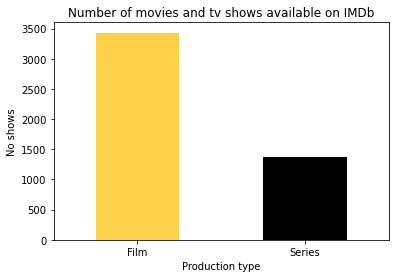

In [6]:
df.Type.value_counts().plot(kind = "bar", color = ['#FED049', 'black'])
plt.title("Number of movies and tv shows available on IMDb")
plt.xlabel("Production type")
plt.xticks(rotation=0)
plt.ylabel("No shows")
plt.show()

2. Display the distribution of Rate for each Violence type

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Moderate'),
  Text(1, 0, 'No Rate'),
  Text(2, 0, 'Severe'),
  Text(3, 0, 'Mild')])

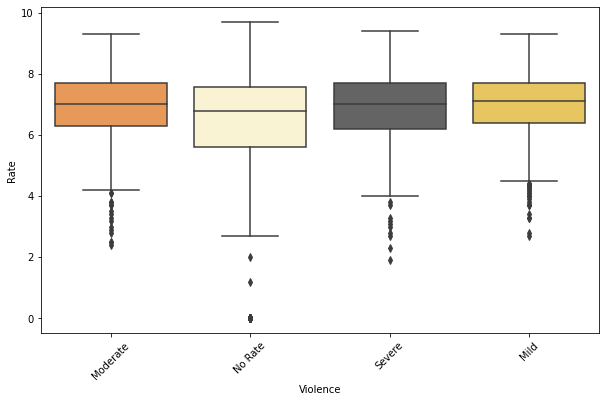

In [7]:
plt.figure(figsize = (10, 6))
ax = sns.boxplot(x = 'Violence', y = 'Rate', data = df, palette = ['#FF9642', '#FFF8CD', '#646464', '#FED049'])
plt.xticks(rotation = 45)

3. Examine the quantitative features of IMDb and how they relate to the Rate

Source: https://www.kaggle.com/code/ekami66/detailed-exploratory-data-analysis-with-python/notebook

In [8]:
quantitative_features_list = ['Votes', 'Duration', 'Episodes']
df_quantitative_values = df[quantitative_features_list]
df_quantitative_values.head()

features_to_analyse = [x for x in quantitative_features_list]
features_to_analyse.append('Rate')
features_to_analyse

['Votes', 'Duration', 'Episodes', 'Rate']

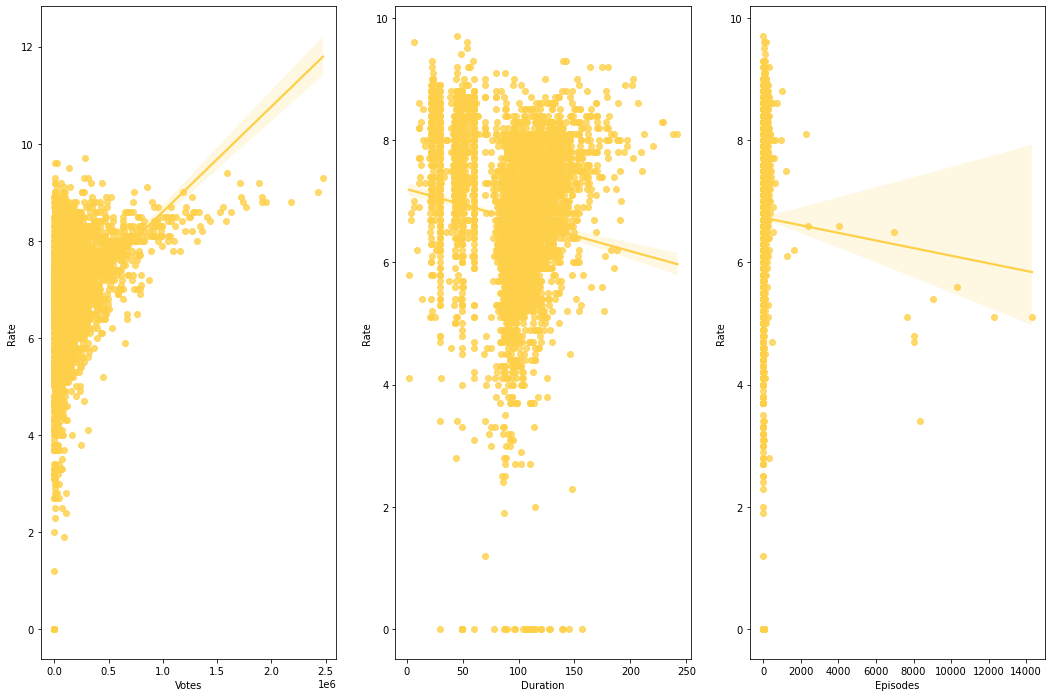

In [9]:
fig, ax = plt.subplots(round(len(features_to_analyse) / 3), 3, figsize = (18, 12))
for i, ax in enumerate(fig.axes):
    if i < len(features_to_analyse) - 1:
        sns.regplot(x = features_to_analyse[i],y = 'Rate', data = df[features_to_analyse], 
                    ax = ax, color = '#FED049')

#### Step 6: Create a Correlation matrix using the library seaborn to display the correlations between your numerical data

In [10]:
df.corr()
#sns.heatmap(df.corr())

,Date,Rate,Votes,Duration,Episodes
Date,1.000000,-0.196504,-0.080440,-0.056858,0.005067
Rate,-0.196504,1.000000,0.286375,-0.115640,-0.016866
Votes,-0.080440,0.286375,1.000000,0.364469,-0.042967
Duration,-0.056858,-0.115640,0.364469,1.000000,-0.130212
Episodes,0.005067,-0.016866,-0.042967,-0.130212,1.000000


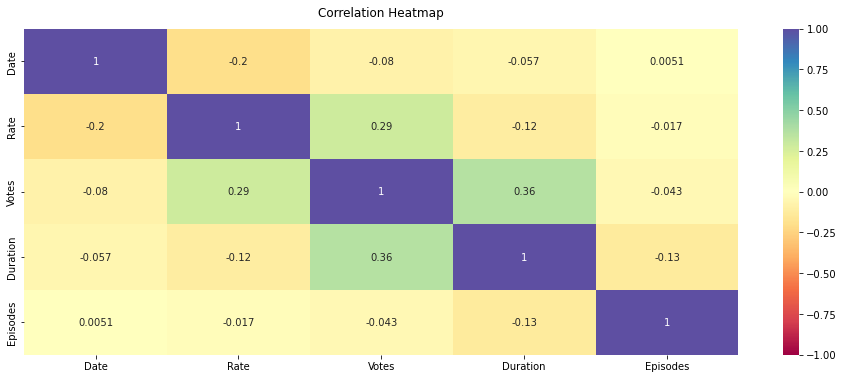

In [11]:
# Increase the size of the heatmap.
plt.figure(figsize = (16, 6))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(df.corr(), vmin = -1, vmax = 1, annot = True, cmap="Spectral")
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict = {'fontsize':12}, pad = 12);

INSIGHTS:
- We can see that there is a weak correlation between no of votes and rate (0.29) and a medium one between no of votes and the duration of a movie or tv show (0.39).

#### Step 7: Transform your categorical data into numerical data (computers don’t like to deal with categorical data)

To see which variables are stored as categorical ones, a good idea is to get info from data with df.info() command. 
- So, we have 9 categorical variables: Name, Genre, Type, Certificate and the last 5 ones that can describe the movie or the tv show.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4804 entries, 0 to 4803
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         4804 non-null   object 
 1   Date         4804 non-null   int64  
 2   Rate         4804 non-null   float64
 3   Votes        4804 non-null   int64  
 4   Genre        4804 non-null   object 
 5   Duration     4804 non-null   float64
 6   Type         4804 non-null   object 
 7   Certificate  4804 non-null   object 
 8   Episodes     4804 non-null   int64  
 9   Nudity       4804 non-null   object 
 10  Violence     4804 non-null   object 
 11  Profanity    4804 non-null   object 
 12  Alcohol      4804 non-null   object 
 13  Frightening  4804 non-null   object 
dtypes: float64(2), int64(3), object(9)
memory usage: 525.6+ KB


In [13]:
# df.drop(['Name', 'Certificate', 'Genre'], axis=1, inplace=True) 

In [14]:
df.drop(['Name', 'Genre'], axis = 1, inplace = True) # we drop Name and Genre column as they're useless in our analysis

#### Step 7.2
Label categorical data for nudity, violence, profanity, alcohol and frightening with numbers from 1 to 3
- No rate = 0
- Mild = 1
- Moderate = 2
- Severe = 3

In [15]:
df['Violence'].value_counts()

Moderate    1436
Mild        1303
No Rate     1086
Severe       979
Name: Violence, dtype: int64

In [16]:
df.replace(to_replace = "Mild", value = 1, inplace=True)
df.replace(to_replace = "Moderate", value = 2, inplace=True)
df.replace(to_replace = "Severe", value = 3, inplace=True)
df.replace(to_replace = "No Rate", value = 0, inplace=True)
df.head()

,Date,Rate,Votes,Duration,Type,Certificate,Episodes,Nudity,Violence,Profanity,Alcohol,Frightening
0,2021,7.6,107163,163.0,Film,PG-13,1,1,2,1,1,2
1,2021,6.3,64375,90.0,Film,R,1,0,0,3,0,2
2,2021,6.4,27145,120.0,Film,R,1,2,3,3,2,2
3,2021,6.4,30443,97.0,Film,PG-13,1,0,2,2,1,2
4,2021,8.3,84636,155.0,Film,PG-13,1,0,2,0,1,2


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4804 entries, 0 to 4803
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         4804 non-null   int64  
 1   Rate         4804 non-null   float64
 2   Votes        4804 non-null   int64  
 3   Duration     4804 non-null   float64
 4   Type         4804 non-null   object 
 5   Certificate  4804 non-null   object 
 6   Episodes     4804 non-null   int64  
 7   Nudity       4804 non-null   int64  
 8   Violence     4804 non-null   int64  
 9   Profanity    4804 non-null   int64  
 10  Alcohol      4804 non-null   int64  
 11  Frightening  4804 non-null   int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 450.5+ KB


In [18]:
list_dummies = [] # creating an empty list (that we will obviously fill right after)
col_names = ['Type', 'Certificate'] # creating a list of our categorical columns (the one we want to deal with)

for col in col_names: # going through each column
    list_dummies.append(pd.get_dummies(df[col])) 
    # appending to the empty list the numerical equivalent of our categorical columns

In [19]:
df_dummies = pd.concat(list_dummies, axis = 1) # concatenating horizontally our "dummy" dataframes
df_final = pd.concat([df, df_dummies], axis = 1) # concatening again with this time our main df
df_final.drop(col_names, axis = 1, inplace = True) # getting rid of the old categorical columns 
    # (and obviously keeping the new ones)

In [20]:
df_final.head()

,Date,Rate,Votes,Duration,Episodes,Nudity,Violence,Profanity,Alcohol,Frightening,...,Passed,R,TV-14,TV-G,TV-MA,TV-PG,TV-Y,TV-Y7,TV-Y7-FV,X
0,2021,7.6,107163,163.0,1,1,2,1,1,2,...,0,0,0,0,0,0,0,0,0,0
1,2021,6.3,64375,90.0,1,0,0,3,0,2,...,0,1,0,0,0,0,0,0,0,0
2,2021,6.4,27145,120.0,1,2,3,3,2,2,...,0,1,0,0,0,0,0,0,0,0
3,2021,6.4,30443,97.0,1,0,2,2,1,2,...,0,0,0,0,0,0,0,0,0,0
4,2021,8.3,84636,155.0,1,0,2,0,1,2,...,0,0,0,0,0,0,0,0,0,0


In [21]:
df_final.corr()

,Date,Rate,Votes,Duration,Episodes,Nudity,Violence,Profanity,Alcohol,Frightening,...,Passed,R,TV-14,TV-G,TV-MA,TV-PG,TV-Y,TV-Y7,TV-Y7-FV,X
Date,1.000000,-0.196504,-0.080440,-0.056858,0.005067,-0.064922,-0.034615,0.045333,-0.061221,-0.040737,...,-0.214642,-0.006156,0.025268,0.025382,0.076484,0.004384,0.001202,0.005757,-0.020356,-0.047068
Rate,-0.196504,1.000000,0.286375,-0.115640,-0.016866,0.172141,0.188391,0.196555,0.249041,0.198339,...,0.037259,-0.013679,0.150799,0.014541,0.171571,0.098956,0.025573,-0.001192,0.035237,0.007944
Votes,-0.080440,0.286375,1.000000,0.364469,-0.042967,0.050264,0.223907,0.147696,0.099770,0.239257,...,-0.007204,0.130910,-0.122518,-0.067459,-0.115934,-0.108595,-0.024412,-0.039710,-0.016312,-0.007728
Duration,-0.056858,-0.115640,0.364469,1.000000,-0.130212,-0.008758,0.184745,0.104401,0.012618,0.222293,...,0.045795,0.355878,-0.396725,-0.167026,-0.356799,-0.319417,-0.076936,-0.103375,-0.078685,0.013137
Episodes,0.005067,-0.016866,-0.042967,-0.130212,1.000000,0.025268,-0.000151,-0.017544,0.036421,-0.006627,...,-0.005241,-0.062605,0.105796,0.055729,-0.010844,0.124104,0.037069,0.008281,0.003696,-0.002341
Nudity,-0.064922,0.172141,0.050264,-0.008758,0.025268,1.000000,0.341244,0.525087,0.539917,0.258827,...,-0.045091,0.286909,0.006033,-0.095564,0.255062,-0.095435,-0.042182,-0.057533,-0.033641,0.053629
Violence,-0.034615,0.188391,0.223907,0.184745,-0.000151,0.341244,1.000000,0.525497,0.385523,0.809209,...,-0.025529,0.368733,-0.040552,-0.128403,0.120111,-0.165127,-0.038044,-0.042648,-0.018630,0.028154
Profanity,0.045333,0.196555,0.147696,0.104401,-0.017544,0.525087,0.525497,1.000000,0.607528,0.413962,...,-0.058886,0.478411,-0.092751,-0.141532,0.235826,-0.158198,-0.050349,-0.078487,-0.051395,0.014936
Alcohol,-0.061221,0.249041,0.099770,0.012618,0.036421,0.539917,0.385523,0.607528,1.000000,0.317473,...,0.008458,0.260169,0.015165,-0.106760,0.222261,-0.065054,-0.050103,-0.084138,-0.033446,0.010173
Frightening,-0.040737,0.198339,0.239257,0.222293,-0.006627,0.258827,0.809209,0.413962,0.317473,1.000000,...,-0.022868,0.318310,-0.058202,-0.116344,0.062108,-0.144971,-0.019562,-0.035256,-0.004202,0.031617


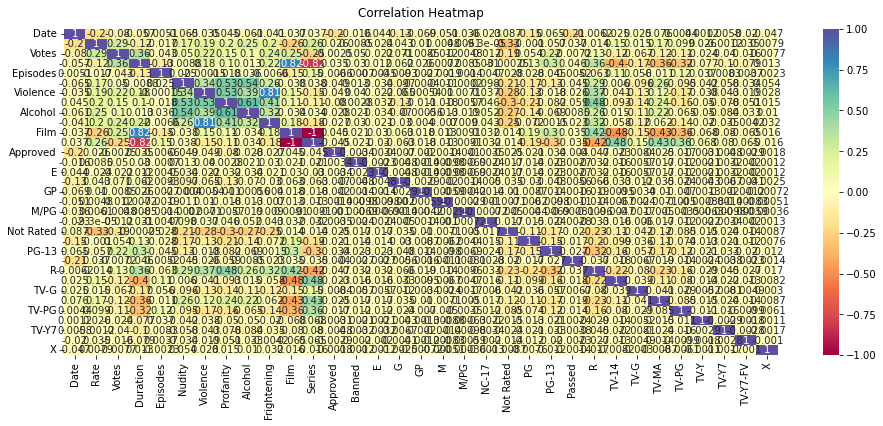

In [22]:
# Increase the size of the heatmap.
plt.figure(figsize = (16, 6))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(df_final.corr(), vmin = -1, vmax = 1, annot = True, cmap="Spectral")
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict = {'fontsize':12}, pad = 12);

#### Step 8: Create a Cramer’s V matrix to display the correlation between your categorical data

Source: https://www.kaggle.com/code/chrisbss1/cramer-s-v-correlation-matrix/notebook 

**Building of the Cramer's V function**

In [23]:
from scipy.stats import chi2_contingency
import numpy as np

def cramers_V(var1,var2) :
  crosstab = np.array(pd.crosstab(var1, var2, rownames = None, colnames = None)) # Cross table building
  stat = chi2_contingency(crosstab)[0] # Keeping of the test statistic of the Chi2 test
  obs = np.sum(crosstab) # Number of observations
  mini = min(crosstab.shape)-1 # Take the minimum value between the columns and the rows of the cross table
  return (stat/(obs*mini))

**Building of the matrix**

In [24]:
rows = []
data_encoded = df_final[[i for i in df_final.columns if i not in ('Date','Rate','Votes','Duration', 'Episodes')]]

for var1 in data_encoded:
  col = []
  for var2 in data_encoded :
    cramers = cramers_V(data_encoded[var1], data_encoded[var2]) # Cramer's V test
    col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V  
  rows.append(col)
  
cramers_results = np.array(rows)
df_cramer = pd.DataFrame(cramers_results, columns = data_encoded.columns, index = data_encoded.columns)
df_cramer

,Nudity,Violence,Profanity,Alcohol,Frightening,Film,Series,Approved,Banned,E,...,Passed,R,TV-14,TV-G,TV-MA,TV-PG,TV-Y,TV-Y7,TV-Y7-FV,X
Nudity,1.00,0.05,0.13,0.13,0.03,0.00,0.00,0.00,0.00,0.00,...,0.00,0.09,0.02,0.01,0.07,0.01,0.00,0.00,0.00,0.01
Violence,0.05,1.00,0.14,0.08,0.35,0.03,0.03,0.00,0.00,0.00,...,0.00,0.16,0.01,0.02,0.02,0.03,0.00,0.00,0.00,0.00
Profanity,0.13,0.14,1.00,0.19,0.08,0.02,0.02,0.01,0.00,0.00,...,0.00,0.24,0.03,0.03,0.06,0.03,0.00,0.01,0.00,0.00
Alcohol,0.13,0.08,0.19,1.00,0.06,0.02,0.02,0.00,0.00,0.00,...,0.00,0.07,0.00,0.02,0.06,0.00,0.00,0.01,0.00,0.00
Frightening,0.03,0.35,0.08,0.06,1.00,0.03,0.03,0.00,0.00,0.00,...,0.00,0.11,0.00,0.01,0.00,0.02,0.00,0.00,0.00,0.00
Film,0.00,0.03,0.02,0.02,0.03,1.00,1.00,0.00,0.00,0.00,...,0.00,0.18,0.23,0.02,0.18,0.13,0.00,0.01,0.00,0.00
Series,0.00,0.03,0.02,0.02,0.03,1.00,1.00,0.00,0.00,0.00,...,0.00,0.18,0.23,0.02,0.18,0.13,0.00,0.01,0.00,0.00
Approved,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.96,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Banned,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.91,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
E,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.91,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


**Add a heatmap to the matrix**

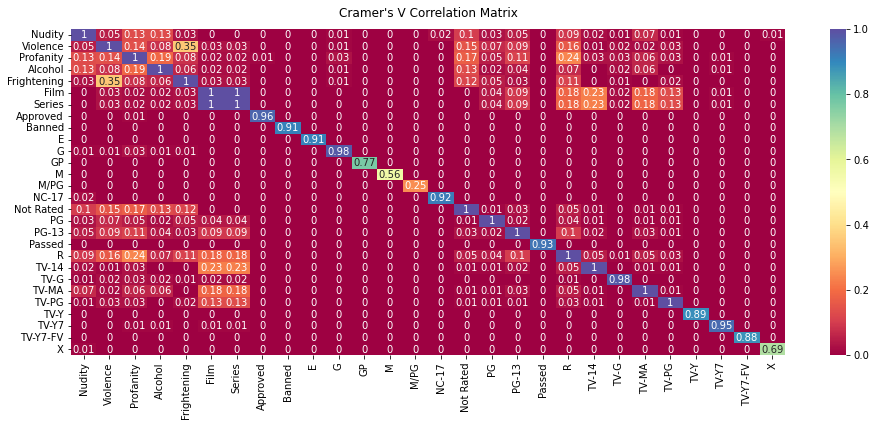

In [25]:
# Increase the size of the heatmap.
plt.figure(figsize = (16, 6))
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
cramer_matrix = sns.heatmap(df_cramer, vmin = 0, vmax = 1, annot = True, cmap = "Spectral")
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
cramer_matrix.set_title("Cramer's V Correlation Matrix", fontdict = {'fontsize':12}, pad = 12);
plt.show()

#### Step 9: Split your data into a training set and a test set using the library scikit-learn
##### Training & Testing datasets

INSIGHTS: 
- The IMDB score is a vote given by a user for every released title in the DB. Individual votes are then aggregated and summarized as a single IMDb rating, which is visible on the title's main page (according to imdb.com) 

In [26]:
X = df_final.drop("Rate", axis = 1) # assigning in X our "features"
y = df_final['Rate'] # assigning in y our "target"

Setting the splitting rate to 70-30 

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42) 
# splitting into a training and testing set

#### Step 10: Machine Learning

You’re now all set in order to predict the IMDb score. You’re free to use any regression model you want (Linear Regression, Decision Tree Regression, Support Vector Machine, etc ...). 
The logic is the same every time:
1. You call the model (e.g lin_reg = LinearRegression()) 
2. You fit the model with your training data (lin_reg.fit(X_train, y_train)
3. You make the prediction (lin_reg.predict(X_test))

##### MODEL 1 -> LINEAR REGRESSION

In [28]:
lin_reg = LinearRegression().fit(X_train, y_train) # calling our model and training it

rate_predictions = lin_reg.predict(X_test) # predicting the "Rate" column and storing our results into rate_predictions

In [29]:
mse = mean_squared_error(y_test, rate_predictions) 
        # applying the mean_squared_error between what we had and what we predicted

rmse = np.sqrt(mse) # applying root square in order to have a concrete result

print(rmse)

1.3357523606845145


In [30]:
print(mse)

1.7842343690742535


In [31]:
mae = mean_absolute_error(y_test, rate_predictions) 
    # applying the mean_absolute_error between what we had and what we predicted
print(mae)

0.8484462491145082


#### Step 11: Use different metrics to highlight your prediction and explain us the meaning of them.

INSIGHTS:
- MSE finds the average squared error between the predicted and actual values.
    - MSE = 1.784
- RMSE essentially shows what is the average deviation in the model-predicted IMDb rate from the target values (the rate of the movies and tv shows in the IMDb dataset).
    - RMSE = 1.336
- MAE (Mean absolute error) finds the average absolute distance between the predicted and target values. 
    - MAE = 0.849

#### Step 12: Plot your final results (by comparing your predictions with your y_test)

Step 12.1: Comparing true values of IMDb rate with the predicted ones

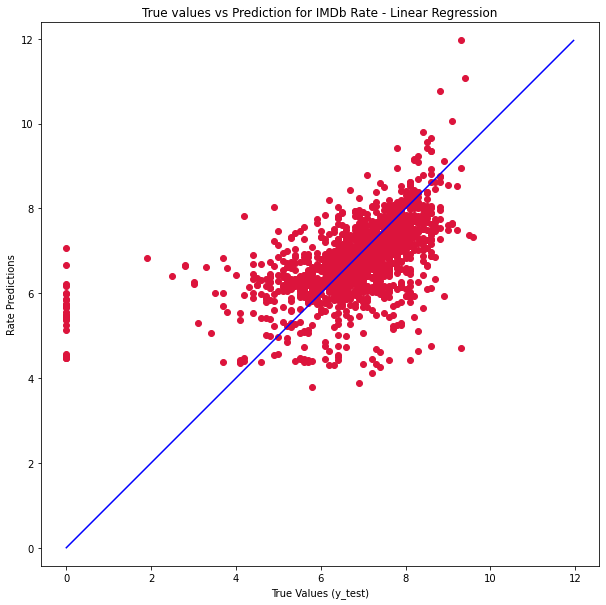

In [32]:
plt.figure(figsize = (10,10))
plt.scatter(y_test, rate_predictions, c = 'crimson')

p1 = max(max(rate_predictions), max(y_test))
p2 = min(min(rate_predictions), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values (y_test)', fontsize = 10)
plt.ylabel('Rate Predictions', fontsize = 10)
plt.axis('equal')
plt.title('True values vs Prediction for IMDb Rate - Linear Regression')
plt.show()

Step 12.2: See how the model works by comparing the true and predicted values in relation to the duration of Movies and TV Shows 

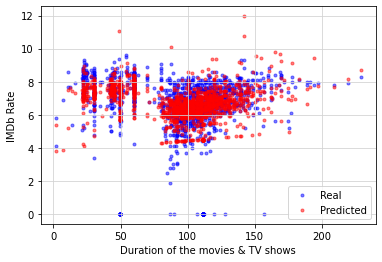

In [33]:
# Define x axis
x_axis = X_test.Duration

# Build scatterplot
plt.scatter(x_axis, y_test, c = 'b', alpha = 0.5, marker = '.', label = 'Real')
plt.scatter(x_axis, rate_predictions, c = 'r', alpha = 0.5, marker = '.', label = 'Predicted')
plt.xlabel('Duration of the movies & TV shows')
plt.ylabel('IMDb Rate')
plt.grid(color = '#D3D3D3', linestyle = 'solid')
plt.legend(loc = 'lower right')
plt.show()

##### MODEL 2 -> DECISION TREE REGRESSION (random forest)

#### Random Forest information

Source: https://www.datacamp.com/tutorial/random-forests-classifier-python#random-forests-vs-decision-trees

#### What is a RANDOM FOREST?
- A supervised learning algorithm  
- it combines in a single model the outputs of many decision trees on various subsets of a dataset. 
- The resulting model represents the average outcome of all the decision trees, which improves the accuracy of predictions. 
- There are two types: for regression and for classifications.

#### Why random?
- Mainly because each decision tree in a random forest is trained on a randomly selected sample from the training set and, possibly, a random set of features.

#### Some advantages: 
- Random forests is considered as a highly accurate and robust method because of the number of decision trees participating in the process.
- It does not suffer from the overfitting problem. The main reason is that it takes the average of all the predictions, which cancels out the biases.

In [34]:
from sklearn.ensemble import RandomForestRegressor

In [35]:
rf = RandomForestRegressor(n_estimators = 300, max_features = 'sqrt', 
                           max_depth = 5, random_state = 18).fit(X_train, y_train)
prediction = rf.predict(X_test)

In [36]:
mse = mean_squared_error(y_test, prediction)
print(mse)

0.9136600184105865


In [37]:
rmse = np.sqrt(mse) # applying root square in order to have a concrete result
print(rmse)

0.9558556472661479


In [38]:
mae = mean_absolute_error(y_test, prediction) # applying the mean_absolute_error between what we had and what we predicted
print(mae)

0.7198466162661414


In [39]:
rf.feature_importances_

array([1.47095101e-01, 3.97887103e-01, 7.33743973e-02, 7.80012771e-02,
       1.80255806e-02, 2.92884596e-02, 2.54687051e-02, 4.75727293e-02,
       3.26470906e-02, 3.51369976e-02, 3.56541090e-02, 5.32460636e-04,
       2.73836060e-05, 5.54883225e-05, 1.04638370e-03, 1.29238451e-05,
       2.91954296e-05, 2.10546053e-05, 5.07056127e-06, 5.80251480e-02,
       1.63630927e-03, 2.62020783e-03, 3.77390821e-04, 1.77240728e-03,
       4.09957003e-03, 5.47668439e-04, 6.44267510e-03, 2.15589207e-03,
       8.84950717e-05, 2.97019695e-04, 4.44665630e-05, 1.12394901e-05])

In [40]:
plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})

<BarContainer object of 32 artists>

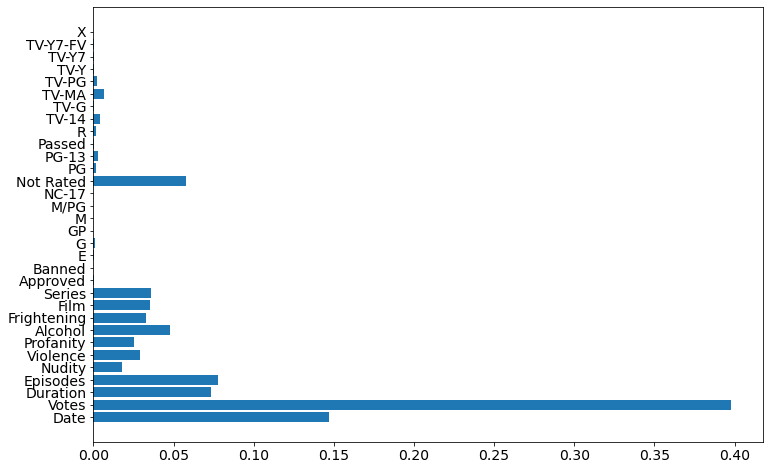

In [41]:
plt.barh(X.columns, rf.feature_importances_)

Text(0.5, 0, 'Random Forest Feature Importance')

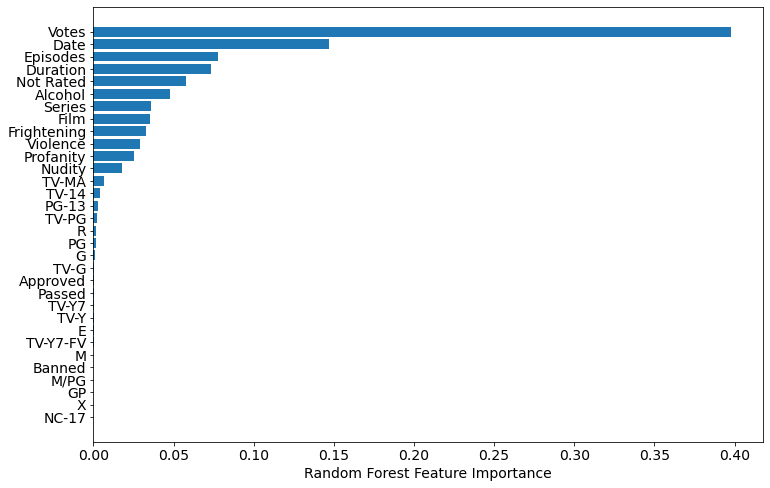

In [42]:
sorted_idx = rf.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

In [43]:
from sklearn.inspection import permutation_importance

In [44]:
perm_importance = permutation_importance(rf, X_test, y_test)

Text(0.5, 0, 'Permutation Importance')

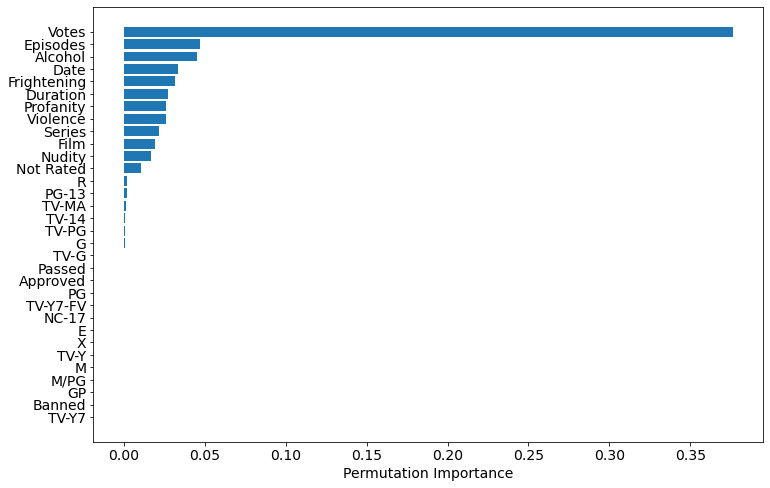

In [45]:
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(X.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

In [58]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 100,
                           n_jobs = -1,
                           oob_score = True,
                           bootstrap = True,
                           random_state = 42)
rf.fit(X_train, y_train)

print('R^2 Training Score: {:.2f} \nOOB Score: {:.2f} \nR^2 Validation Score: {:.2f}'.format(rf.score(X_train, y_train), 
                                                                                             rf.oob_score_,
                                                                                             rf.score(X_test, y_test)))

R^2 Training Score: 0.97 
OOB Score: 0.76 
R^2 Validation Score: 0.78


In [60]:
!pip install rfpimp

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 40.3 MB/s eta 0:00:0000:0100:01
  Created wheel for rfpimp: filename=rfpimp-1.3.7-py3-none-any.whl size=10669 sha256=17b7bc58590cbece6a76c02da61ec83903ee5f9507d58d7781ffad920dbade5e
  Stored in directory: /Users/roxanel/Library/Caches/pip/wheels/8a/42/e5/d2e9d77df351103d7d16dbc82ce6090cb2f71cee74b7380b7b
Successfully built rfpimp
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.1
    Uninstalling numpy-1.24.1:
      Successfully uninstalled numpy-1.24.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.55.1 requires numpy<1.22,>=1.18, but you have numpy 1.22.4 which is incompatible.
You should consider upgrading via the '/opt/homebrew/Caskroom/miniforge/base/envs/conda_env/bin/python3.8 -m pip install --upgrade pip' command.


In [63]:
from sklearn.metrics import r2_score
from rfpimp import permutation_importances

def r2(rf, X_train, y_train):
    return r2_score(y_train, rf.predict(X_train))

perm_imp_rfpimp = permutation_importances(rf, X_train, y_train, r2)
perm_imp_rfpimp

,Importance
Feature,
Votes,1.565811e+00
Episodes,2.670277e-01
Duration,1.771672e-01
Date,1.126798e-01
Violence,3.438040e-02
PG-13,2.692193e-02
Nudity,2.261367e-02
Profanity,1.826302e-02
Frightening,1.422141e-02


INSIGHTS:
- MSE finds the average squared error between the predicted and actual values.
    - MSE = 0.914
- RMSE essentially shows what is the average deviation in the model-predicted IMDb rate from the target values (the rate of the movies and tv shows in the IMDb dataset).
    - RMSE = 0.956
- MAE (Mean absolute error) finds the average absolute distance between the predicted and target values. 
    - MAE = 0.72

Step 12.1: Comparing true values of IMDb rate with the predicted ones

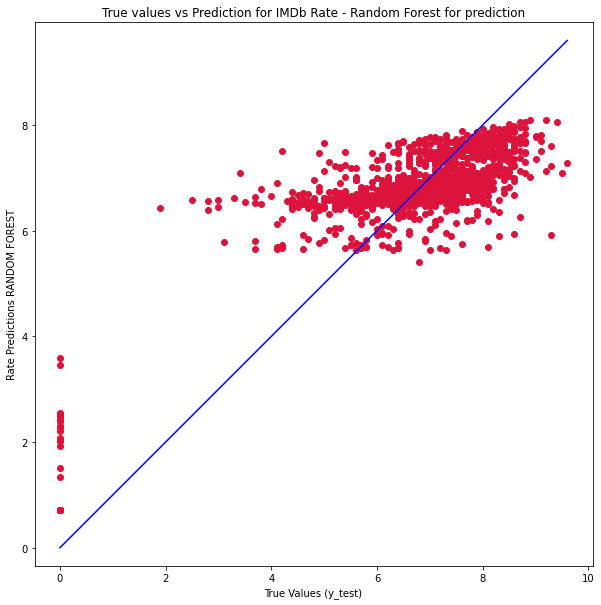

In [39]:
plt.figure(figsize = (10,10))
plt.scatter(y_test, prediction, c = 'crimson')

p1 = max(max(prediction), max(y_test))
p2 = min(min(prediction), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values (y_test)', fontsize = 10)
plt.ylabel('Rate Predictions RANDOM FOREST', fontsize = 10)
plt.axis('equal')
plt.title('True values vs Prediction for IMDb Rate - Random Forest for prediction')
plt.show()

Step 12.2: See how the model works by comparing the true and predicted values in relation to the duration of Movies and TV Shows 

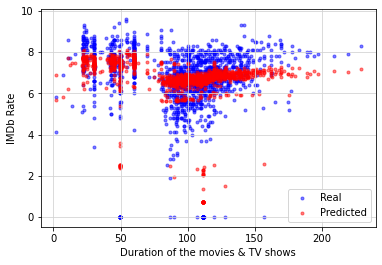

In [40]:
# Define x axis
x_axis = X_test.Duration

# Build scatterplot
plt.scatter(x_axis, y_test, c = 'b', alpha = 0.5, marker = '.', label = 'Real')
plt.scatter(x_axis, prediction, c = 'r', alpha = 0.5, marker = '.', label = 'Predicted')
plt.xlabel('Duration of the movies & TV shows')
plt.ylabel('IMDb Rate')
plt.grid(color = '#D3D3D3', linestyle = 'solid')
plt.legend(loc = 'lower right')
plt.show()

***Model comparison***

In [41]:
models = {"Random forest" : rf,
          "Linear Regression" : lin_reg}
scores = { }

for key, value in models.items():    
    model = value
    model.fit(X_train, y_train)
    scores[key] = model.score(X_test, y_test)

In [42]:
scores_frame = pd.DataFrame(scores, index = ["Accuracy Score"]).T
scores_frame.sort_values(by = ["Accuracy Score"], axis = 0 ,ascending = False, inplace = True)
scores_frame

,Accuracy Score
Random forest,0.654845
Linear Regression,0.325967


In terms of metrics

| Metrics | LINEAR REGRESSION| RANDOM FOREST FOR PREDICTION |
| --- | --- | --- |
| MSE | 1.784| 0.914|
| RMSE | 1.336 | 0.956 |
| MAE | 0.849 | 0.72 |
| Accuracy Score | 0.326 | 0.655 |